# Homework 5 Solutions
2025

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot params for new size


## 1. Linear Fitting and the $\chi^2$

In [3]:
def line(x,m,b):
    '''Function of a line.
    y = m*x +b
    m - slope
    b - y-intercept
    '''
    return m*x + b

def chi2(x,y,u,m,b):
    '''Chi-Squared for a linear function line that takes slope m and y-intercept b
    sum ( (y - line(x,m,b))**2 / u**2) '''
    return np.sum((y - line(x,m,b))**2/u**2)

### 1. Data Set 1

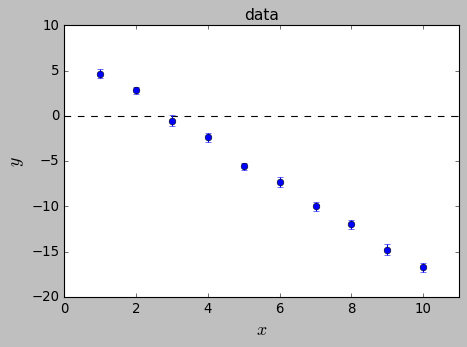

In [4]:
data = np.loadtxt("https://www.eg.bucknell.edu/~phys310/skills/data_analysis/hw5_data/data1.dat")  
x,y,u = data.T

plt.figure()
plt.title("data",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='black', linestyle = '--')
plt.xlim(0,11) 
plt.ylim(-20,10) 
plt.errorbar(x,y,yerr=u,fmt='ob')
plt.show()

slope = -2.4209437772338407 +/- 0.05485452857624501 

intercept = 7.153495091840029 +/- 0.32702141169803844 

covariance matrix = 
 [[ 0.00300902 -0.01575129]
 [-0.01575129  0.106943  ]] 

chi2 = 5.638329587568617


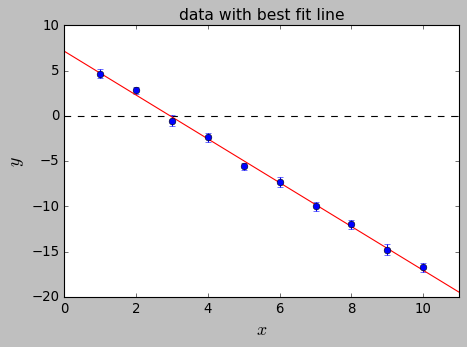

In [5]:
popt, pcov = curve_fit(line, x, y, sigma=u, absolute_sigma=True)

slope = popt[0]
alpha_m = np.sqrt(pcov[0,0])  # Std error in slope
intercept = popt[1]
alpha_b = np.sqrt(pcov[1,1])  # Std error in intercept

print("slope =", slope,"+/-", alpha_m,"\n")
print("intercept =", intercept,"+/-", alpha_b,"\n")

print("covariance matrix =","\n",pcov,"\n")
pcov_data = pcov

print("chi2 =", chi2(x, y, u,*popt))

a = chi2(x,y,u,*popt)

plt.figure()
plt.title("data with best fit line",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='black', linestyle = '--')
plt.xlim(0,11) 
plt.errorbar(x,y,yerr=u,fmt='ob')
xc = np.linspace(0,11,2) # A set of x values to plot the best fit line and make it pretty
plt.plot(xc,line(xc,*popt), 'r')
plt.show()

##### The results of the fit are:
**m = -2.42 $\pm$ 0.05  
b = 7.2 $\pm$ 0.3**

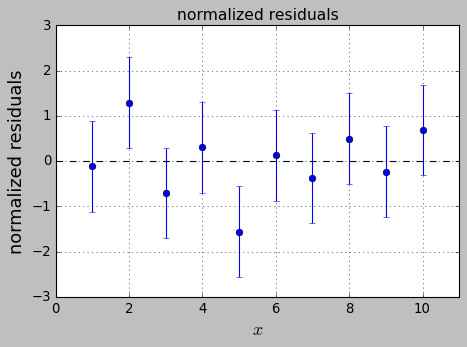

In [6]:
plt.figure()
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('normalized residuals')
plt.grid(True)
plt.axhline(0,color='black', linestyle = '--')
plt.errorbar(x,(y - line(x,slope,intercept))/u, 1 ,fmt='ob')
plt.xlim(0,11)
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_5500/703047387.py:17: SyntaxWarning: invalid escape sequence '\c'
  plt.title('$\chi^2 - \chi^2_{min}$')


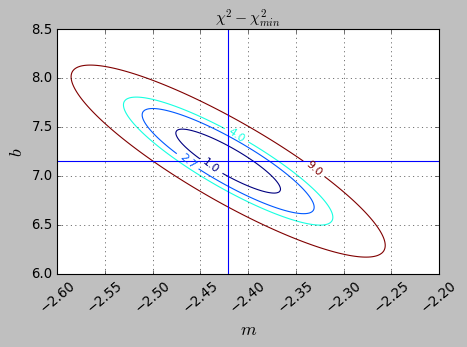

In [7]:
m = np.linspace(-2.6, -2.2, 201)
b = np.linspace(6.0, 8.5, 201)
M, B = np.meshgrid(m, b, indexing='ij')

Z = np.zeros((len(m),len(b)))

for i in range(len(m)):
    for j in range(len(b)):
        Z[i,j] = chi2(x, y, u, m[i],b[j]) - chi2(x, y, u, *popt)


plt.figure()
CS = plt.contour(M, B, Z, levels=[1,2.7,4,9])
plt.xlabel('$m$')
plt.ylabel('$b$')
plt.xticks(rotation = 40)
plt.title('$\chi^2 - \chi^2_{min}$')
plt.grid()
plt.axhline(intercept)
plt.axvline(slope)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_5500/2291807857.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.title('$\chi^2 - \chi^2_{min}$')


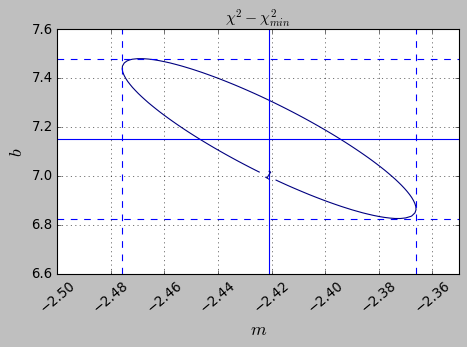

In [8]:
plt.figure()
CS = plt.contour(M, B, Z, levels=[1])
plt.xlabel('$m$')
plt.ylabel('$b$')
plt.xticks(rotation = 40)

plt.title('$\chi^2 - \chi^2_{min}$')
plt.grid()
plt.axhline(intercept)
plt.axvline(slope)

plt.xlim(-2.5,-2.35)
plt.ylim(6.6,7.6)


plt.axhline(intercept + alpha_b, linestyle='--')
plt.axhline(intercept - alpha_b, linestyle='--')
plt.axvline(slope + alpha_m, linestyle='--')
plt.axvline(slope - alpha_m, linestyle='--')

plt.clabel(CS, inline=1, fontsize=10)
plt.show()

The slope $m$ goes from about -2.47 to about -2.37, so $\alpha_m \approx 0.05$.  Matches up well with what the fitting program returned.

The y-intercept $b$ goes from about 6.82 to about 7.46, so $\alpha_b \approx 0.3$  Also matches up well with what the fitting program returned.

And the $\chi^2$ ended up 5.6.  There are 10 data points, so you would expect $\chi^2$ to be something in the range of 5 to 20.  (Actually, this is too simplistic as we'll discuss in the next class.  Really, there are 8 degrees of freedom, so you really should expect $\chi^2$ to be around 8.  And then the question is whether 5.6 is close enough to 8.  It will turn out that the answer is "yes", although you will see better how to answer that more carefully in the next class.

So, yes, the fit seems reasonable.

## 1. Data Set 2

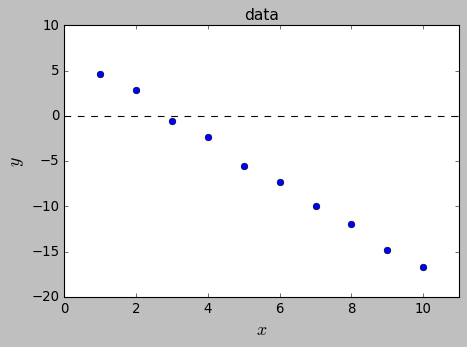

In [9]:
data = np.loadtxt("https://www.eg.bucknell.edu/~phys310/skills/data_analysis/hw5_data/data2.dat")  
x,y,u = data.T

plt.figure()
plt.title("data",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='black', linestyle = '--')
plt.xlim(0,11) 
plt.ylim(-20,10) 
plt.errorbar(x,y,yerr=u,fmt='ob')
plt.show()

slope = -2.4209437777283687 +/- 0.005485452919779413 

intercept = 7.153495095811331 +/- 0.03270214141650884 

covariance matrix = 
 [[ 3.00901937e-05 -1.57512954e-04]
 [-1.57512954e-04  1.06943005e-03]] 

chi2 = 563.8329587568617


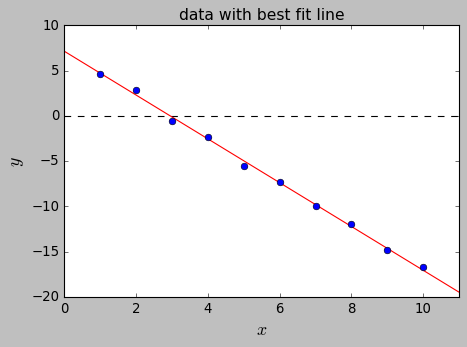

In [10]:
popt, pcov = curve_fit(line, x, y, sigma=u, absolute_sigma=True)

slope = popt[0]
alpha_m = np.sqrt(pcov[0,0])  # Std error in slope
intercept = popt[1]
alpha_b = np.sqrt(pcov[1,1])  # Std error in intercept

print("slope =", slope,"+/-", alpha_m,"\n")
print("intercept =", intercept,"+/-", alpha_b,"\n")

print("covariance matrix =","\n",pcov,"\n")
pcov_data = pcov

print("chi2 =", chi2(x, y, u,*popt))

a = chi2(x,y,u,*popt)

plt.figure()
plt.title("data with best fit line",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='black', linestyle = '--')
plt.xlim(0,11) 
plt.errorbar(x,y,yerr=u,fmt='ob')
xc = np.linspace(0,11,2) # A set of x values to plot the best fit line and make it pretty
plt.plot(xc,line(xc,*popt), 'r')
plt.show()

##### The results of the fit are:
**m = -2.421 $\pm$ 0.005  
b = 7.15 $\pm$ 0.03**

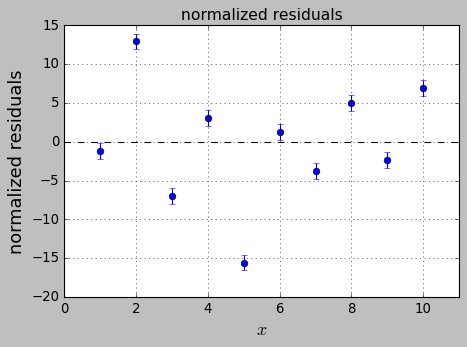

In [11]:
plt.figure()
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('normalized residuals')
plt.grid(True)
plt.axhline(0,color='black', linestyle = '--')
plt.errorbar(x,(y - line(x,slope,intercept))/u, 1 ,fmt='ob')
plt.xlim(0,11)
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_5500/3424501853.py:17: SyntaxWarning: invalid escape sequence '\c'
  plt.title('$\chi^2 - \chi^2_{min}$')


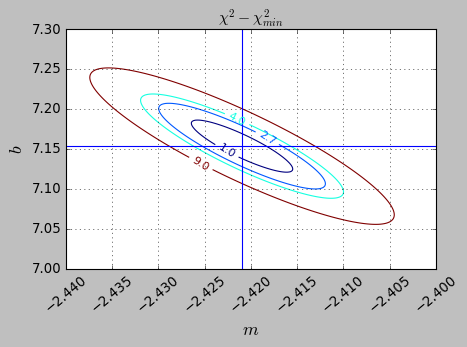

In [12]:
m = np.linspace(-2.44, -2.4, 201)
b = np.linspace(7.0, 7.3, 201)
M, B = np.meshgrid(m, b, indexing='ij')

Z = np.zeros((len(m),len(b)))

for i in range(len(m)):
    for j in range(len(b)):
        Z[i,j] = chi2(x, y, u, m[i],b[j]) - chi2(x, y, u, *popt)


plt.figure()
CS = plt.contour(M, B, Z, levels=[1,2.7,4,9])
plt.xlabel('$m$')
plt.xticks(rotation = 40)
plt.ylabel('$b$')
plt.title('$\chi^2 - \chi^2_{min}$')
plt.grid()
plt.axhline(intercept)
plt.axvline(slope)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:10: SyntaxWarning: invalid escape sequence '\c'
/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_5500/588861978.py:10: SyntaxWarning: invalid escape sequence '\c'
  plt.title('$\chi^2 - \chi^2_{min}$')


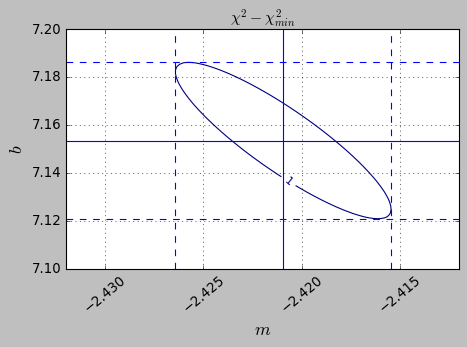

In [13]:
plt.figure()
CS = plt.contour(M, B, Z, levels=[1])
plt.xlabel('$m$')
plt.ylabel('$b$')
plt.xticks(rotation = 40)

# When the little numbers are stupid and have a -2.4 offset in the corner:
plt.gca().get_xaxis().get_major_formatter().set_useOffset(False)

plt.title('$\chi^2 - \chi^2_{min}$')
plt.grid()
plt.axhline(intercept)
plt.axvline(slope)

plt.xlim(-2.432,-2.412)
plt.ylim(7.1,7.2)


plt.axhline(intercept + alpha_b, linestyle='--')
plt.axhline(intercept - alpha_b, linestyle='--')
plt.axvline(slope + alpha_m, linestyle='--')
plt.axvline(slope - alpha_m, linestyle='--')

plt.clabel(CS, inline=1, fontsize=10)
plt.show()

The slope $m$ goes from about -2.427 to about -2.417, so $\alpha_m \approx 0.005$.  Matches up well with what the fitting program returned.  Of course, we already know that this fit is suspect, so we shouldn't be getting excited about small uncertainties here.

The y-intercept $b$ goes from about 7.12 to about 7.19, so $\alpha_b \approx 0.03$  Also matches up well with what the fitting program returned.

And $\chi^2$ ended up 564.  There are 10 data points, so you would expect $\chi^2$ to be something in the range of 5 to 20.  (Actually, this is too simplistic as we'll discuss in the next class.  Really, there are 8 degrees of freedom, so you really should expect $\chi^2$ to be around 8.) As we'll discuss in the next class, you can determine how unlikely this scenario is if the model is valid.  But it's going to be awful -- this $\chi^2$ is a factor of 100 higher than should be expected.

So, no, this is not a reasonable fit to the data.  Either (a) the model is invalid; or (b) the uncertainties in the data points were vastly underestimated.

## 1. Data Set 3

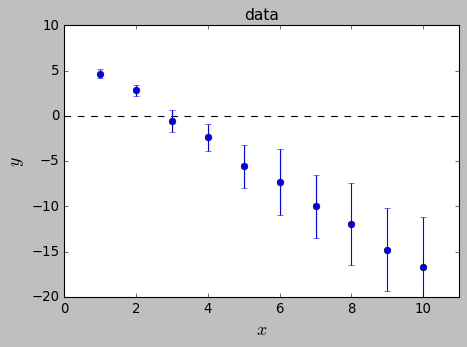

In [14]:
data = np.loadtxt("https://www.eg.bucknell.edu/~phys310/skills/data_analysis/hw5_data/data3.dat")  
x,y,u = data.T

plt.figure()
plt.title("data",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='black', linestyle = '--')
plt.xlim(0,11) 
plt.ylim(-20,10) 
plt.errorbar(x,y,yerr=u,fmt='ob')
plt.show()

slope = -2.4297297726592304 +/- 0.23898144515012146 

intercept = 7.275960715429464 +/- 0.5831187399474907 

covariance matrix = 
 [[ 0.05711213 -0.11226488]
 [-0.11226488  0.34002746]] 

chi2 = 0.8759879697266499


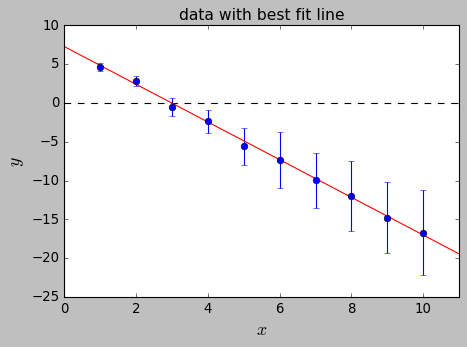

In [15]:
popt, pcov = curve_fit(line, x, y, sigma=u, absolute_sigma=True)

slope = popt[0]
alpha_m = np.sqrt(pcov[0,0])  # Std error in slope
intercept = popt[1]
alpha_b = np.sqrt(pcov[1,1])  # Std error in intercept

print("slope =", slope,"+/-", alpha_m,"\n")
print("intercept =", intercept,"+/-", alpha_b,"\n")

print("covariance matrix =","\n",pcov,"\n")
pcov_data = pcov

print("chi2 =", chi2(x, y, u,*popt))

a = chi2(x,y,u,*popt)

plt.figure()
plt.title("data with best fit line",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='black', linestyle = '--')
plt.xlim(0,11) 
plt.errorbar(x,y,yerr=u,fmt='ob')
xc = np.linspace(0,11,2) # A set of x values to plot the best fit line and make it pretty
plt.plot(xc,line(xc,*popt), 'r')
plt.show()

##### The results of the fit are:
**m = -2.4 $\pm$ 0.2  
b = 7.2 $\pm$ 0.6**

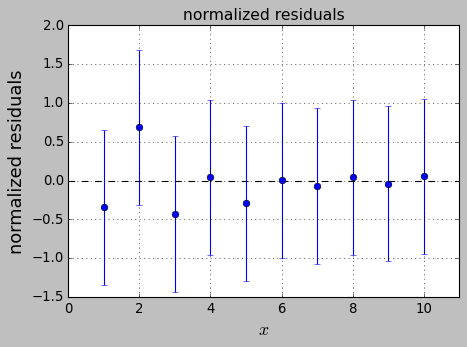

In [16]:
plt.figure()
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('normalized residuals')
plt.grid(True)
plt.axhline(0,color='black', linestyle = '--')
plt.errorbar(x,(y - line(x,slope,intercept))/u, 1 ,fmt='ob')
plt.xlim(0,11)
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_5500/464328818.py:17: SyntaxWarning: invalid escape sequence '\c'
  plt.title('$\chi^2 - \chi^2_{min}$')


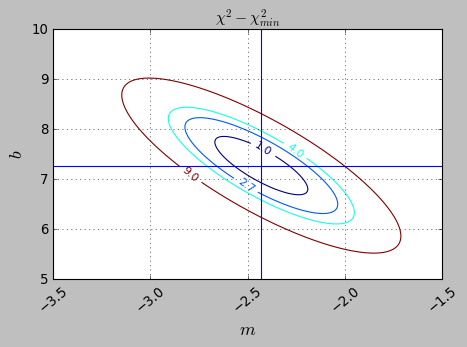

In [17]:
m = np.linspace(-3.5, -1.5, 201)
b = np.linspace(5, 10, 201)
M, B = np.meshgrid(m, b, indexing='ij')

Z = np.zeros((len(m),len(b)))

for i in range(len(m)):
    for j in range(len(b)):
        Z[i,j] = chi2(x, y, u, m[i],b[j]) - chi2(x, y, u, *popt)


plt.figure()
CS = plt.contour(M, B, Z, levels=[1,2.7,4,9])
plt.xlabel('$m$')
plt.xticks(rotation = 40)
plt.ylabel('$b$')
plt.title('$\chi^2 - \chi^2_{min}$')
plt.grid()
plt.axhline(intercept)
plt.axvline(slope)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_5500/3215510190.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.title('$\chi^2 - \chi^2_{min}$')


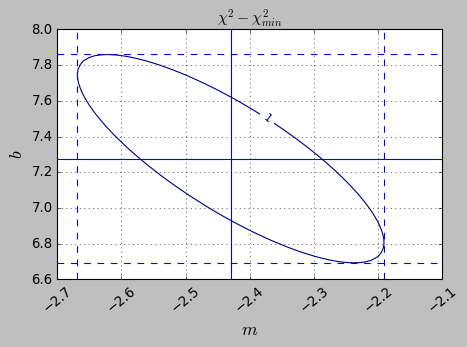

In [18]:
plt.figure()
CS = plt.contour(M, B, Z, levels=[1])
plt.xlabel('$m$')
plt.ylabel('$b$')
plt.xticks(rotation = 40)

plt.title('$\chi^2 - \chi^2_{min}$')
plt.grid()
plt.axhline(intercept)
plt.axvline(slope)

plt.xlim(-2.7,-2.1)
plt.ylim(6.6,8)


plt.axhline(intercept + alpha_b, linestyle='--')
plt.axhline(intercept - alpha_b, linestyle='--')
plt.axvline(slope + alpha_m, linestyle='--')
plt.axvline(slope - alpha_m, linestyle='--')

plt.clabel(CS, inline=1, fontsize=10)
plt.show()

The slope $m$ goes from about -2.65 to about -2.19, so $\alpha_m \approx 0.2$.  Matches up well with what the fitting program returned.  

The y-intercept $b$ goes from about 6.7 to about 7.8, so $\alpha_b \approx 0.5$  Also matches up reasonably well with what the fitting program returned.

The $\chi^2$ ended up 0.9.  There are 10 data points, so you would expect $\chi^2$ to be something in the range of 5 to 20.  (Actually, this is too simplistic as we'll discuss in the next class.  Really, there are 8 degrees of freedom, so you really should expect $\chi^2$ to be around 8.) As we'll discuss in the next class, you can determine how unlikely this scenario is if the model is valid.  But this isn't good  -- this $\chi^2$ is a factor of 10 lower than should be expected.

So, there are problems here.  This is exactly the kind of fit that people will often say that everything is fine because $\chi^2$ is small.  But it is _too_ small.  So, most likely, the uncertainties in the data points were overestimated.

## 1. Data Set 4

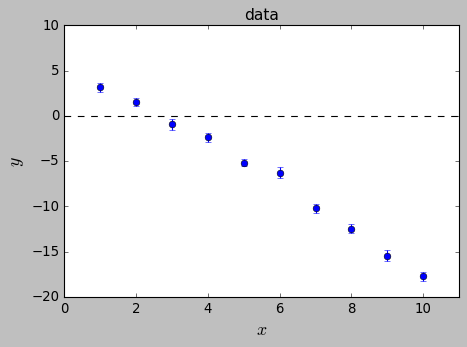

In [19]:
data = np.loadtxt("https://www.eg.bucknell.edu/~phys310/skills/data_analysis/hw5_data/data4.dat")  
x,y,u = data.T

plt.figure()
plt.title("data",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='black', linestyle = '--')
plt.xlim(0,11) 
plt.ylim(-20,10) 
plt.errorbar(x,y,yerr=u,fmt='ob')
plt.show()

slope = -2.352810852699081 +/- 0.05485452970541749 

intercept = 6.340479543587715 +/- 0.327021414510538 

covariance matrix = 
 [[ 0.00300902 -0.0157513 ]
 [-0.0157513   0.10694301]] 

chi2 = 13.399099820728384


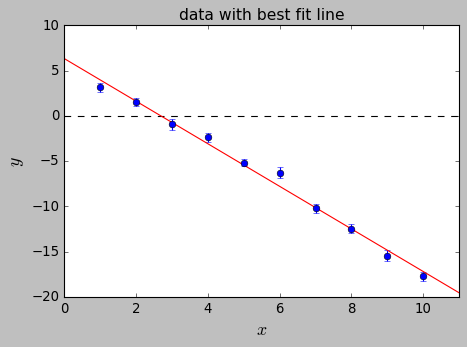

In [20]:
popt, pcov = curve_fit(line, x, y, sigma=u, absolute_sigma=True)

slope = popt[0]
alpha_m = np.sqrt(pcov[0,0])  # Std error in slope
intercept = popt[1]
alpha_b = np.sqrt(pcov[1,1])  # Std error in intercept

print("slope =", slope,"+/-", alpha_m,"\n")
print("intercept =", intercept,"+/-", alpha_b,"\n")

print("covariance matrix =","\n",pcov,"\n")
pcov_data = pcov

print("chi2 =", chi2(x, y, u,*popt))

a = chi2(x,y,u,*popt)

plt.figure()
plt.title("data with best fit line",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='black', linestyle = '--')
plt.xlim(0,11) 
plt.errorbar(x,y,yerr=u,fmt='ob')
xc = np.linspace(0,11,2) # A set of x values to plot the best fit line and make it pretty
plt.plot(xc,line(xc,*popt), 'r')
plt.show()

##### The results of the fit are:
**m = -2.35 $\pm$ 0.05  
b = 6.3 $\pm$ 0.3**

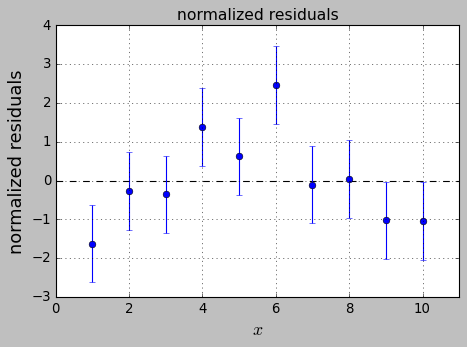

In [21]:
plt.figure()
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('normalized residuals')
plt.grid(True)
plt.axhline(0,color='black', linestyle = '--')
plt.errorbar(x,(y - line(x,slope,intercept))/u, 1 ,fmt='ob')
plt.xlim(0,11)
plt.show()

<>:17: SyntaxWarning: invalid escape sequence '\c'
<>:17: SyntaxWarning: invalid escape sequence '\c'
/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_5500/748292195.py:17: SyntaxWarning: invalid escape sequence '\c'
  plt.title('$\chi^2 - \chi^2_{min}$')


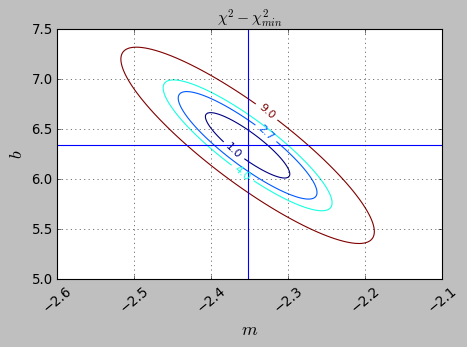

In [22]:
m = np.linspace(-2.6, -2.1, 201)
b = np.linspace(5, 7.5, 201)
M, B = np.meshgrid(m, b, indexing='ij')

Z = np.zeros((len(m),len(b)))

for i in range(len(m)):
    for j in range(len(b)):
        Z[i,j] = chi2(x, y, u, m[i],b[j]) - chi2(x, y, u, *popt)


plt.figure()
CS = plt.contour(M, B, Z, levels=[1,2.7,4,9])
plt.xlabel('$m$')
plt.xticks(rotation = 40)
plt.ylabel('$b$')
plt.title('$\chi^2 - \chi^2_{min}$')
plt.grid()
plt.axhline(intercept)
plt.axvline(slope)
plt.clabel(CS, inline=1, fontsize=10)
plt.show()

<>:7: SyntaxWarning: invalid escape sequence '\c'
<>:7: SyntaxWarning: invalid escape sequence '\c'
/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_5500/1597594478.py:7: SyntaxWarning: invalid escape sequence '\c'
  plt.title('$\chi^2 - \chi^2_{min}$')


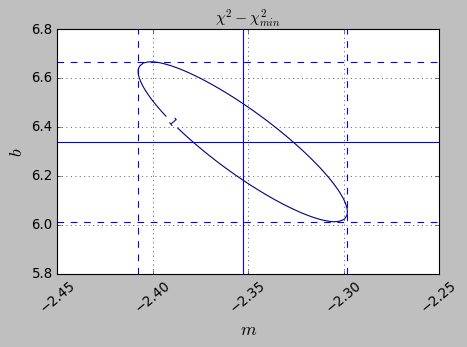

In [23]:
plt.figure()
CS = plt.contour(M, B, Z, levels=[1])
plt.xlabel('$m$')
plt.ylabel('$b$')
plt.xticks(rotation = 40)

plt.title('$\chi^2 - \chi^2_{min}$')
plt.grid()
plt.axhline(intercept)
plt.axvline(slope)

plt.xlim(-2.45,-2.25)
plt.ylim(5.8,6.8)


plt.axhline(intercept + alpha_b, linestyle='--')
plt.axhline(intercept - alpha_b, linestyle='--')
plt.axvline(slope + alpha_m, linestyle='--')
plt.axvline(slope - alpha_m, linestyle='--')

plt.clabel(CS, inline=1, fontsize=10)
plt.show()

The slope $m$ goes from about -2.41 to about -2.30, so $\alpha_m \approx 0.05$.  Matches up well with what the fitting program returned.  

The y-intercept $b$ goes from about 6.0 to about 6.7, so $\alpha_b \approx 0.3$  Also matches up reasonably well with what the fitting program returned.

The $\chi^2 = 13$, which is perfectly fine for a fit with 10 data points and 8 degrees of freedom.  So, it's hard to claim statistically that the linear model doesn't fit the data. 

The problem with this data is easier to see in the residuals.  The first three data points are high, then next three are low, and then they go high again.  In other words, there is a pattern to the residuals that should make a linear fit questionable.  A pattern like this suggests that a fit with a quadratic component (${ax}^2$) might be appropriate.

The best you can say, I think, is that you should be suspicious of the linear model, and that you need more (or better) data. This is an example where simply looking at $\chi^2$ is insufficient.




## 2. Fit_4 Data

In [24]:
def lorentz(x,a,b,c,d):
    '''Lorentzian function with amplitude a, width parameter c, peak location b, and vertical offset d'''
    return (a* c**2 / ((x-b)**2 +c**2) ) + d

def chi2(x,y,u,a,b,c,d):
    '''Chi-Squared for a Lorentzian function lorentz that takes slope m and y-intercept b
    sum ( (y - lorentz(x, a,b,c,d))**2 / u**2) '''
    return np.sum((y - lorentz(x, a,b,c,d))**2/u**2)


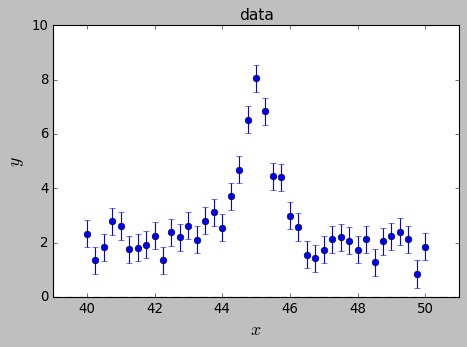

In [25]:
data = np.loadtxt("https://www.eg.bucknell.edu/~phys310/skills/data_analysis/hw5_data/fit_4.dat")  
x,y,u = data.T

plt.figure()
plt.title("data",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='black', linestyle = '--')
plt.xlim(39,51) 
plt.ylim(0,10) 
plt.errorbar(x,y,yerr=u,fmt='ob')
plt.show()

a = 6.2027858757182015 +/- 0.4094820071191058 

b = 45.009326600219346 +/- 0.03139997772340235 

c = 0.473269304508845 +/- 0.051392540651594244 

d = 1.831028012216032 +/- 0.1056771091373003 

covariance matrix = 
 [[ 1.67675514e-01  2.18578291e-05 -1.19952156e-02 -2.75937398e-03]
 [ 2.18578291e-05  9.85958601e-04 -3.93766256e-06  3.73259180e-06]
 [-1.19952156e-02 -3.93766256e-06  2.64119323e-03 -2.79582294e-03]
 [-2.75937398e-03  3.73259180e-06 -2.79582294e-03  1.11676514e-02]] 

chi2 = 30.69514526275241


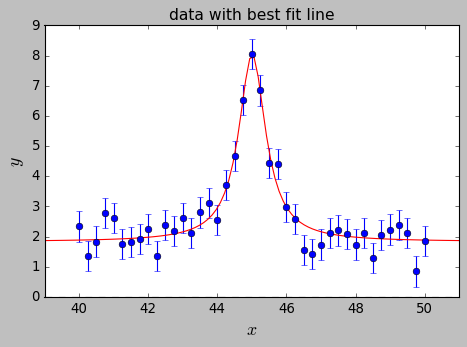

In [26]:
# For nonlinear functions, you need initial guesses!
popt, pcov = curve_fit(lorentz, x, y, sigma=u, p0 = [10,45,1,2], absolute_sigma=True)

a,b,c,d = popt
alpha_a = np.sqrt(pcov[0,0])
alpha_b = np.sqrt(pcov[1,1])
alpha_c = np.sqrt(pcov[2,2])
alpha_d = np.sqrt(pcov[3,3])


print("a =", a,"+/-", alpha_a,"\n")
print("b =", b,"+/-", alpha_b,"\n")
print("c =", c,"+/-", alpha_c,"\n")
print("d =", d,"+/-", alpha_d,"\n")



print("covariance matrix =","\n",pcov,"\n")
pcov_data = pcov

print("chi2 =", chi2(x, y, u,*popt))

res = chi2(x,y,u,*popt)

plt.figure()
plt.title("data with best fit line",fontsize=14)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.axhline(0,color='black', linestyle = '--')
plt.xlim(39,51) 
plt.errorbar(x,y,yerr=u,fmt='ob')
xc = np.linspace(39,51,100) # A set of x values to plot the best fit line and make it pretty
plt.plot(xc,lorentz(xc,*popt), 'r')
plt.show()

##### The results of the fit are:
**a = 6.2 $\pm$ 0.4   
b = 45.01 $\pm$ 0.03   
c = 0.47 $\pm$ 0.05   
d = 1.8 $\pm$ 0.1**

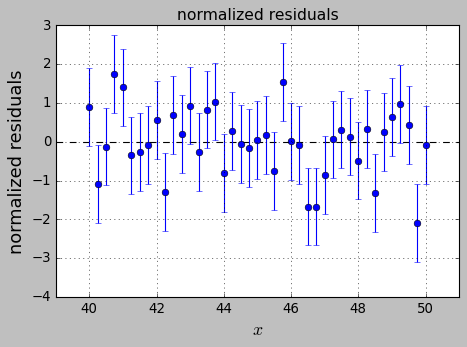

In [27]:
plt.figure()
plt.title('normalized residuals')
plt.xlabel('$x$')
plt.ylabel('normalized residuals')
plt.grid(True)
plt.axhline(0,color='black', linestyle = '--')
plt.errorbar(x,(y - lorentz(x,*popt))/u, 1 ,fmt='ob')
plt.xlim(39,51)
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\c'
/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_5500/3168972437.py:19: SyntaxWarning: invalid escape sequence '\c'
  plt.title('$\chi^2 - \chi^2_{min}$')


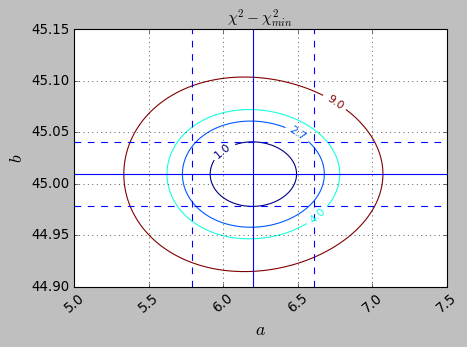

In [28]:
# Correlation of a and b

ac = np.linspace(5, 7.5, 201)
bc = np.linspace(44.9, 45.15, 201)
A, B = np.meshgrid(ac, bc, indexing='ij')

Z = np.zeros((len(ac),len(bc)))

for i in range(len(ac)):
    for j in range(len(bc)):
        Z[i,j] = chi2(x, y, u, ac[i],bc[j],c,d) - chi2(x, y, u, *popt)


plt.figure()
CS = plt.contour(A, B, Z, levels=[1,2.7,4,9])
plt.xlabel('$a$')
plt.xticks(rotation = 40)
plt.ylabel('$b$')
plt.title('$\chi^2 - \chi^2_{min}$')
plt.grid()
plt.axhline(b)
plt.axvline(a)

plt.axhline(b + alpha_b, linestyle='--')
plt.axhline(b - alpha_b, linestyle='--')
plt.axvline(a + alpha_a, linestyle='--')
plt.axvline(a - alpha_a, linestyle='--')


plt.clabel(CS, inline=1, fontsize=10)
plt.xlim(min(ac),max(ac))
plt.ylim(min(bc),max(bc))
plt.show()

<>:19: SyntaxWarning: invalid escape sequence '\c'
<>:19: SyntaxWarning: invalid escape sequence '\c'
/var/folders/4g/t47fn81n7kb23j5m1zcdp59h0000gn/T/ipykernel_5500/1428836563.py:19: SyntaxWarning: invalid escape sequence '\c'
  plt.title('$\chi^2 - \chi^2_{min}$')


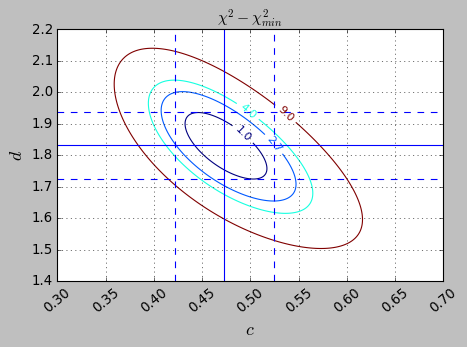

In [29]:
# Correlation of c and d

cc = np.linspace(0.3, 0.7, 201)
dc = np.linspace(1.4, 2.2, 201)
C, D = np.meshgrid(cc, dc, indexing='ij')

Z = np.zeros((len(cc),len(dc)))

for i in range(len(cc)):
    for j in range(len(dc)):
        Z[i,j] = chi2(x, y, u, a,b,cc[i],dc[j]) - chi2(x, y, u, *popt)


plt.figure()
CS = plt.contour(C, D, Z, levels=[1,2.7,4,9])
plt.xlabel('$c$')
plt.xticks(rotation = 40)
plt.ylabel('$d$')
plt.title('$\chi^2 - \chi^2_{min}$')
plt.grid()
plt.axhline(d)
plt.axvline(c)

plt.axhline(d + alpha_d, linestyle='--')
plt.axhline(d - alpha_d, linestyle='--')
plt.axvline(c + alpha_c, linestyle='--')
plt.axvline(c - alpha_c, linestyle='--')


plt.clabel(CS, inline=1, fontsize=10)
plt.xlim(min(cc),max(cc))
plt.ylim(min(dc),max(dc))
plt.show()

The contour plots of the two sets of parameters show that the uncertainties are consistent with the fitting program. Particularly, the fitting program gave reasonable values for $\alpha_b$ and $\alpha_d$, but may have slightly overestimated the uncertainties $\alpha_a$ and $\alpha_c$. Overall, the values are reasonably the same to the first significant digit.

You might note that the b vs a contour plot is not tilted. This means a and b are very independent. The tilt of the d vs c contour plot indicates some correlation. 


In [30]:
%load_ext version_information

In [31]:
version_information numpy, scipy, matplotlib

Software versions
Python 3.12.8 64bit [Clang 14.0.6 ]
IPython 8.30.0
OS macOS 15.3.2 arm64 arm 64bit
numpy 2.2.2
scipy 1.15.1
matplotlib 3.10.0
Sat Apr 05 22:43:19 2025 EDT